1) Load in the dataset `https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv` into a pandas dataframe

In [2]:
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.linear_model import Ridge
%matplotlib inline

df=pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv',index_col=0)
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


2) Convert `default` and `student` to categorical variables.

In [3]:
df["default"]=df["default"].astype('category')
df["student"]=df["student"].astype('category')

df.replace({'default':{'No':0,'Yes':1},'student':{'No':0,'Yes':1}},inplace=True)

df.head()

,default,student,balance,income
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879


3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no. 

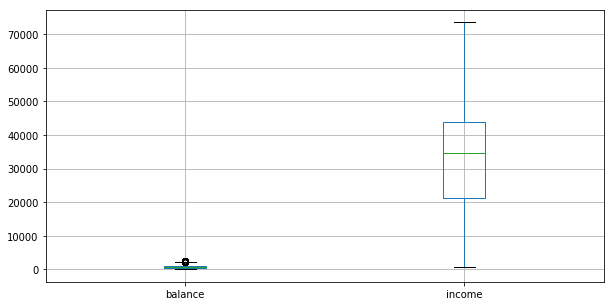

In [4]:
plt.figure(figsize=(10,5))
df.boxplot(column=['balance','income'])


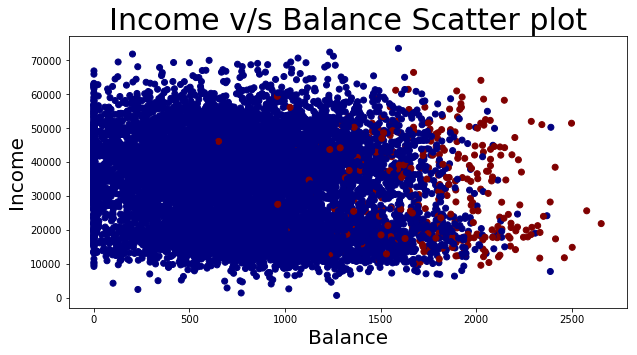

In [5]:
#fig, ax = plt.subplots()
#groups=df.groupby('default')
plt.figure(figsize=(10,5))

cmap = plt.cm.jet
plt.scatter(df['balance'],df['income'],c = df['default'],cmap = cmap)
plt.xlabel('Balance', fontsize = 20)
plt.ylabel('Income', fontsize = 20)
plt.title('Income v/s Balance Scatter plot', fontsize = 30)


plt.show()


4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley
on the `balance` and `income` variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

In [6]:
X = df.drop(['default','student'], axis =1)
y = df['default']
# Split the data into test and training sets, with 30% of samples being put into the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c)
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train, y_train))
    print('Test accuracy:', clf.score(X_test, y_test))
    print('')





C: 10
Coefficient of each feature: [[5.44632659e-03 1.65519593e-05]]
Training accuracy: 0.9738571428571429
Test accuracy: 0.9723333333333334

C: 1
Coefficient of each feature: [[5.41567973e-03 1.60192068e-05]]
Training accuracy: 0.974
Test accuracy: 0.9723333333333334

C: 0.1
Coefficient of each feature: [[4.48604800e-03 2.40251237e-06]]
Training accuracy: 0.9728571428571429
Test accuracy: 0.97

C: 0.001
Coefficient of each feature: [[ 0.00043005 -0.00013044]]
Training accuracy: 0.9681428571428572
Test accuracy: 0.962



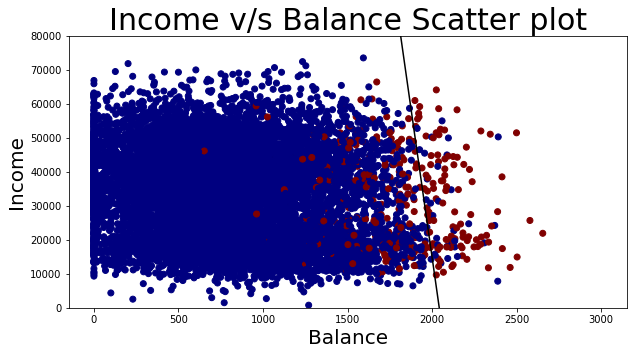

Index(['balance', 'income'], dtype='object')


In [7]:
from pandas import Series
import pandas as pd
from numpy.random import randn
X = df.drop(['default','student'], axis =1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = LogisticRegression(penalty='l1', C=1)
clf.fit(X_train, y_train)
predictors1 = X_train.columns
c2=clf.coef_[0]


#Scatter plot
plt.figure(figsize=(10,5))

plt.ylim(0,80000)
cmap = plt.cm.jet
plt.scatter(df['balance'],df['income'], c = df['default'],cmap = cmap)
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 3000)
yy = a * xx - (clf.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')
plt.xlabel('Balance', fontsize = 20)
plt.ylabel('Income', fontsize = 20)
plt.title('Income v/s Balance Scatter plot', fontsize = 30)
plt.show()

print(predictors1)

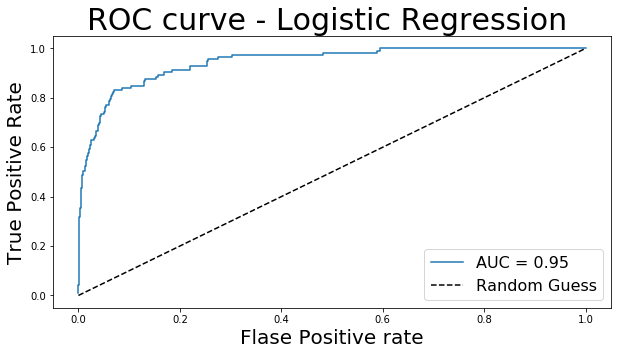

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
from matplotlib import pyplot as plt
from sklearn import metrics
predictions = clf.predict_proba(X_test)



clf = LogisticRegression(penalty='l1', C=1)
clf.fit(X_train, y_train)

predictions = clf.predict_proba(X_test)

fpr2, tpr2, _ = roc_curve(y_test, predictions[:,1])
roc_auc2 = auc(fpr2, tpr2)
plt.figure(figsize=(10,5))
plt.plot(fpr2, tpr2,label ='AUC = %.2f'%(roc_auc2))
plt.xlabel('Flase Positive rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('ROC curve - Logistic Regression ', fontsize = 30)
plt.legend(loc=4, prop={'size': 12})
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label = 'Random Guess')
plt.legend(loc=4, prop={'size': 16})
plt.show()

5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking
of coefficients.  How does performance improve with the added variable?

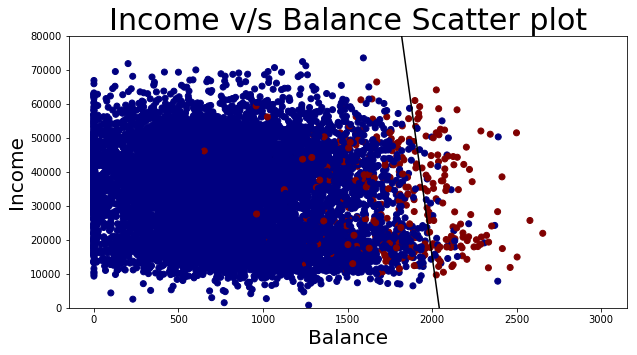

In [9]:
from pandas import Series
X = df.drop(['default'], axis =1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

ridgeReg= Ridge(alpha = 1,normalize = True)
ridgeReg.fit(X_train, y_train)
pred = ridgeReg.predict(X_test)
co=ridgeReg.coef_

predictors2 = X_train.columns
coef_rdg = Series(co,predictors2).sort_values()
coef_clf = Series(c2,predictors1).sort_values()


plt.figure(figsize=(10,5))

plt.ylim(0,80000)
cmap = plt.cm.jet
plt.scatter(df['balance'],df['income'], c = df['default'],cmap = cmap)
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 3000)
yy = a * xx - (clf.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')
plt.xlabel('Balance', fontsize = 20)
plt.ylabel('Income', fontsize = 20)
plt.title('Income v/s Balance Scatter plot', fontsize = 30)
plt.show()

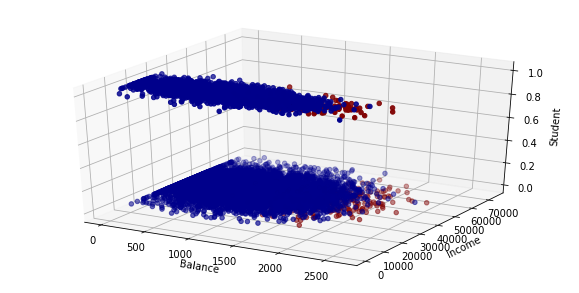

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

X = df.drop(['default'], axis =1)
y = df['default']
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

xs = X[X.columns[1]]
ys = X[X.columns[2]]
zs = X[X.columns[0]]

ax.scatter(xs[y==1],ys[y==1],zs[y==1],color='maroon')
ax.scatter(xs[y==0],ys[y==0],zs[y==0],color='darkblue' )
plt.xlabel('Balance')
plt.ylabel('Income')
ax.set_zlabel('Student')
plt.show()

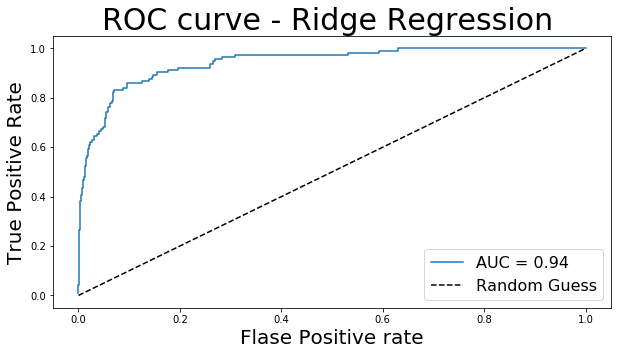

In [11]:
predictions1 = ridgeReg.predict(X_test)

fpr1, tpr1, _ = roc_curve(y_test, predictions1)
roc_auc1 = auc(fpr1, tpr1)
plt.figure(figsize=(10,5))
plt.plot(fpr1, tpr1, label ='AUC = %.2f'%(roc_auc1))
plt.xlabel('Flase Positive rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('ROC curve - Ridge Regression ', fontsize = 30)
plt.legend(loc=4, prop={'size': 12})
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label = 'Random Guess')
plt.legend(loc=4, prop={'size': 16})
plt.show()

Coefficient of Ridge Regression
Index(['student', 'balance', 'income'], dtype='object')
[ 1.76779150e-03  6.18356658e-05 -3.73581074e-09]

Coefficient of Logistic Regression
Index(['balance', 'income'], dtype='object')
[5.35700274e-03 1.52796173e-05]


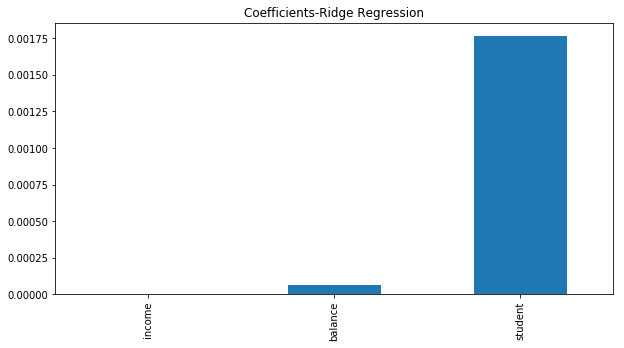

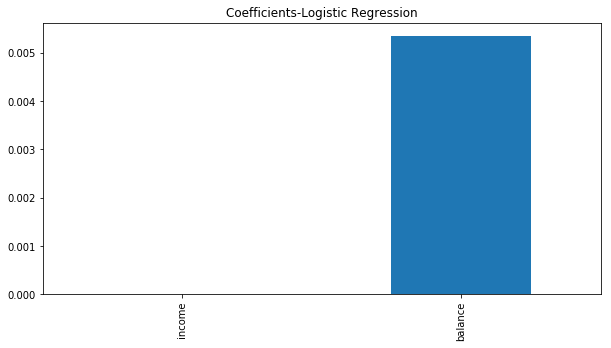

In [12]:
plt.figure(figsize=(10,5))
coef_rdg.plot(kind='bar', title='Coefficients-Ridge Regression')
plt.figure(figsize=(10,5))
coef_clf.plot(kind='bar', title='Coefficients-Logistic Regression')

print('Coefficient of Ridge Regression')
print(predictors2)
print(co)
print('')
print('Coefficient of Logistic Regression')
print(predictors1)
print(c2)


6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

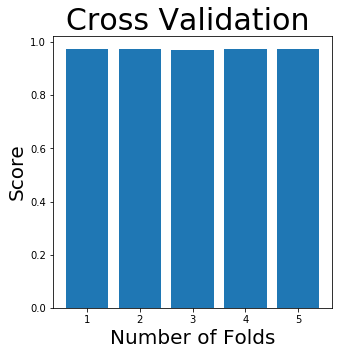

In [13]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime
from sklearn.tree import DecisionTreeClassifier

clf = LogisticRegression(penalty='l1', C=1)
regr_1 = DecisionTreeClassifier(max_depth=5)

R2=cross_val_score(clf, X, y, cv=5)
R2_A=cross_val_score(regr_1, X, y, cv=5)

plt.figure(figsize = (5,5))

plt.xlabel('Number of Folds', fontsize = 20)
plt.ylabel('Score', fontsize = 20)
plt.title('Cross Validation ', fontsize = 30)


R1=plt.bar((1,2,3,4,5),R2)
plt.show()
mean_R2=R2.mean()
mean_R2_A=R2_A.mean()

std_R2=R2.std()
std_R2_A=R2_A.std()




plt.show()

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


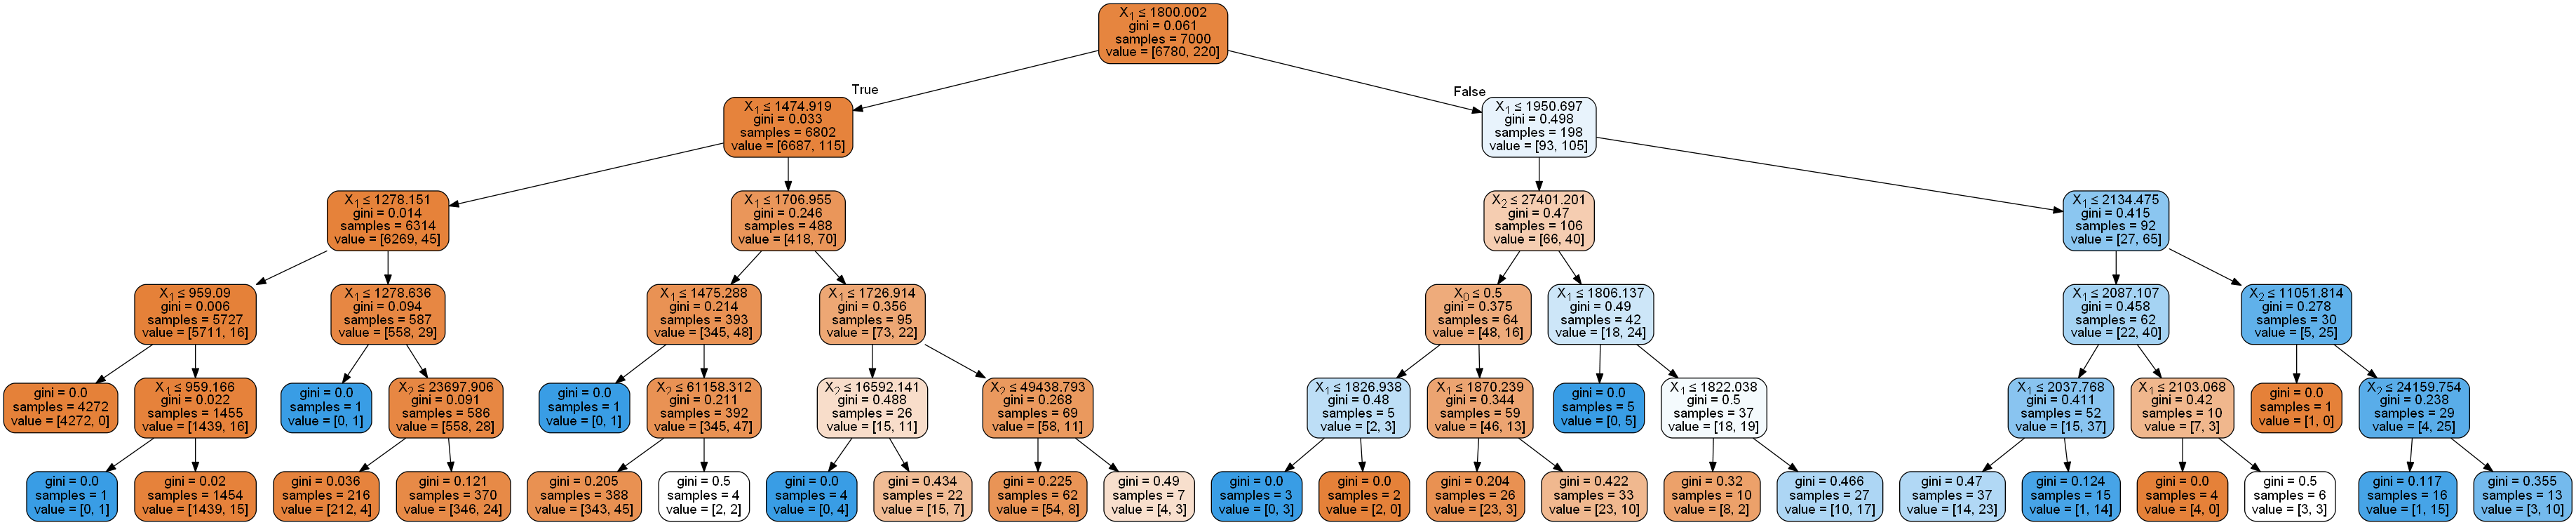

In [14]:
from sklearn import tree
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import sklearn.cross_validation as cv
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regr_1 = DecisionTreeClassifier(max_depth=5)
regr_1.fit(X_train, y_train)
y = regr_1.predict(X_test)


dot_data = StringIO()
export_graphviz(regr_1, out_file=dot_data,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), unconfined = True)



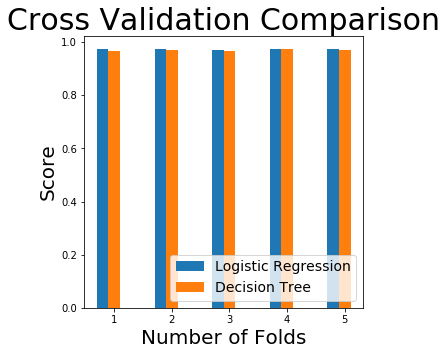

Mean:
Logistic Regression 0.9730998447249611
Decision Tree 0.9701002941500736

Standard Deviation:
Logistic Regression 0.0011609538101708626
Decision Tree 0.0020302229544899297


In [15]:
from sklearn.model_selection import cross_val_score
from matplotlib.pyplot import *

plt.figure(figsize = (5, 5))
ax = plt.subplot(111)

R1=ax.bar((1-0.2,2-0.2,3-0.2,4-0.2,5-0.2),R2, width = 0.2)
R1_A=ax.bar((1,2,3,4,5),R2_A, width = 0.2)



plt.xlabel('Number of Folds', fontsize = 20)
plt.ylabel('Score', fontsize = 20)
plt.title('Cross Validation Comparison', fontsize = 30)
plt.legend([R1, R1_A],["Logistic Regression","Decision Tree"], loc=4, prop={'size': 14})
plt.show()

print('Mean:')
print('Logistic Regression', mean_R2)
print('Decision Tree', mean_R2_A)
print('')
print('Standard Deviation:')
print('Logistic Regression', std_R2)
print('Decision Tree', std_R2_A)

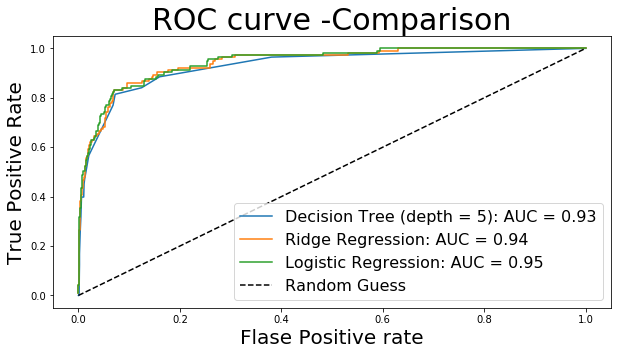

In [16]:


model = DecisionTreeClassifier(max_depth = 5)
model.fit(X_train, y_train)
predictions4 = model.predict_proba(X_test)

fpr4, tpr4, _ = roc_curve(y_test, predictions4[:,1])
roc_auc4 = auc(fpr4, tpr4)

plt.figure(figsize=(10,5))
plt.plot(fpr4, tpr4, label = 'Decision Tree (depth = 5): AUC = %.2f'%(roc_auc4))
plt.plot(fpr1, tpr1, label ='Ridge Regression: AUC = %.2f'%(roc_auc1))
plt.plot(fpr2, tpr2,label ='Logistic Regression: AUC = %.2f'%(roc_auc2))
plt.xlabel('Flase Positive rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('ROC curve -Comparison', fontsize = 30)
plt.legend(loc=4, prop={'size': 12})
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label = 'Random Guess')
plt.legend(loc=4, prop={'size': 16})
plt.show()

8) Find the optimal decision tree depth and compute the AUC ROC. 

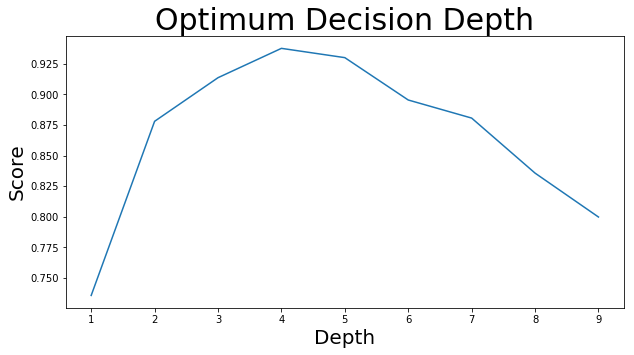

In [17]:
from sklearn.model_selection import train_test_split


X = df.drop(['default','student'], axis =1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

train_errors=[]
test_errors=[]
scores=[]
plt.figure(figsize = (10,5))
depths = range(1,10)
for n in depths:
    
    regr = DecisionTreeClassifier(max_depth=n)
    regr.fit(X_train, y_train)
    scores.append(cross_val_score(regr, X, y, cv = 10, scoring = 'roc_auc').mean())
    
plt.plot(depths, scores)
plt.xlabel('Depth', fontsize = 20)
plt.ylabel('Score', fontsize = 20)
plt.title('Optimum Decision Depth', fontsize = 30)
plt.legend(loc=4, prop={'size': 16})




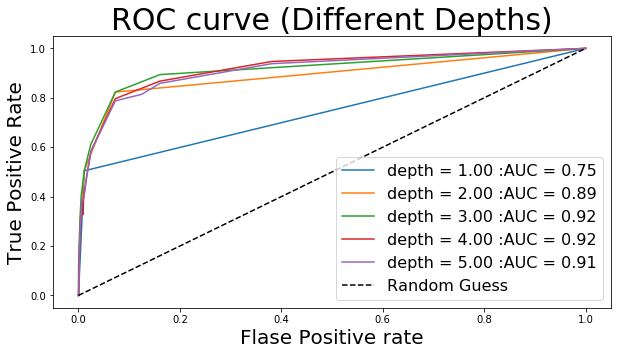

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
from matplotlib import pyplot as plt
from sklearn import metrics

roc_auc = []
depths = range(1,6)

plt.figure(figsize = (10,5))
for n in depths:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    model = DecisionTreeClassifier(max_depth = n)
    model.fit(X_train, y_train)
    predictions = model.predict_proba(X_test)

    fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'depth = %.2f :AUC = %.2f'%(n, roc_auc))
    plt.xlabel('Flase Positive rate', fontsize = 20)
    plt.ylabel('True Positive Rate', fontsize = 20)
    plt.title('ROC curve (Different Depths)', fontsize = 30)
    plt.legend(loc=4, prop={'size': 16})
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label = 'Random Guess')
plt.legend(loc=4, prop={'size': 16})
plt.show()